**About NETFLIX**

Netflix is one of the most popular media and video streaming platforms. They have over 10000 movies or tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

Business Problem

Analyze the data and generate insights that could help Netflix ijn deciding which type of shows/movies to produce and how they can grow the business in different countries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv")

Data exploration :

In [87]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [88]:
df.tail(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [9]:
df.shape

(8807, 12)

In [10]:
df.size

105684

In [11]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [12]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


**To find duplicates and null values**

In [14]:
df[df.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [15]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

<Axes: >

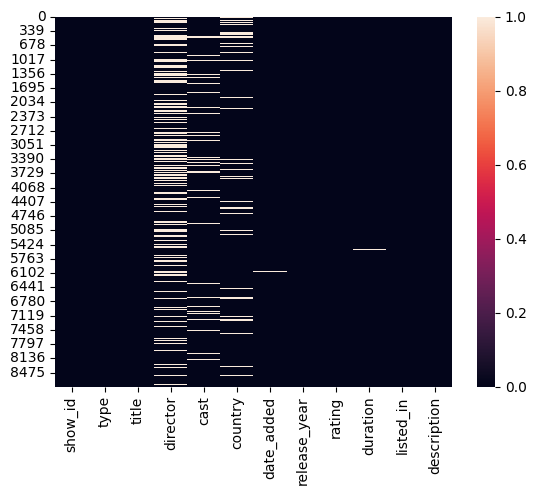

In [16]:
sns.heatmap(df.isnull())

How has the number of movies released per year changed over the last 20-30 years?

<Axes: xlabel='release_year', ylabel='Count'>

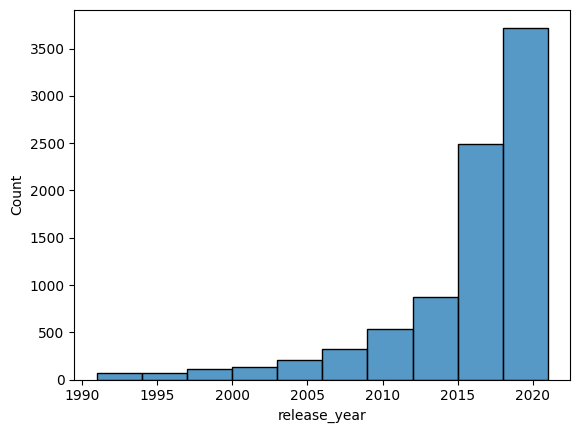

In [17]:
year = df[df["release_year"] > 1990]
sns.histplot(data = year, x = "release_year", bins = 10)

**During the year 2015 - 2020 there are many movies released when compared to previous years.**

Comparison of tv shows vs. movies.

In [89]:
m = df[df["type"]=='Movie']
t = df[df["type"]=='TV Show']

In [19]:
m["show_id"].size

6131

In [20]:
t["show_id"].size

2676

<Axes: xlabel='type', ylabel='Count'>

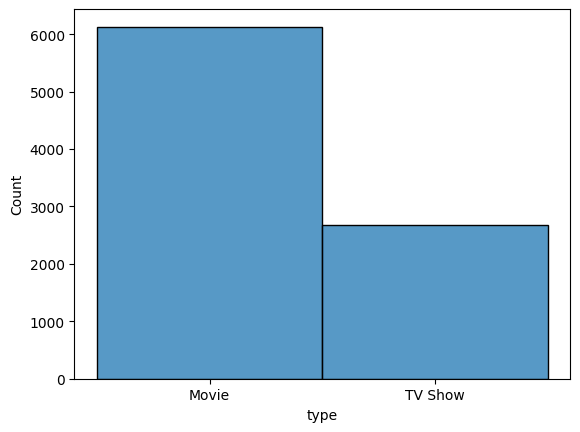

In [21]:
sns.histplot(data = df, x = "type")

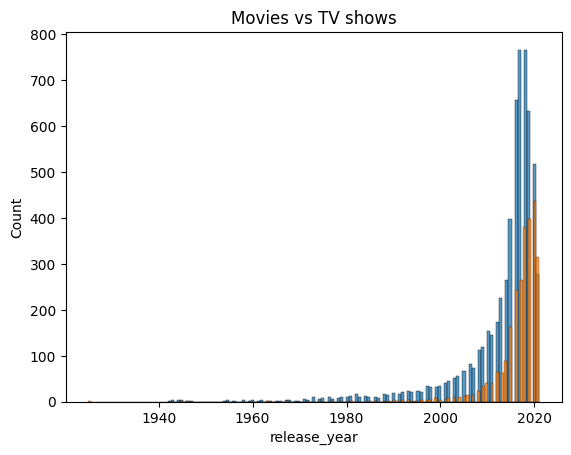

In [90]:
sns.histplot(data = m , x ="release_year", label = "Movies").set(title = "Movies vs TV shows")
sns.histplot(data = t , x ="release_year", label = "TVshows")
plt.show()

What is the best time to launch a TV show?

In [98]:
t["launch_date"]= pd.to_datetime(t["date_added"])
t["launch_date"].dt.month.value_counts().sort_index()

1.0     192
2.0     181
3.0     213
4.0     214
5.0     193
6.0     236
7.0     262
8.0     236
9.0     251
10.0    215
11.0    207
12.0    266
Name: launch_date, dtype: int64

<Axes: >

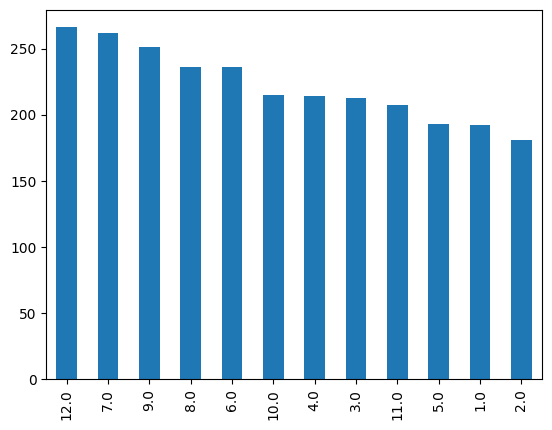

In [99]:
t["launch_date"].dt.month.value_counts().plot(kind = "bar")

We see that in the month of december there are more numbers of movies launched, hence we concluded that Decemeber month is the best time launch the TV show

Analysis of actors/directors of different types of shows/movies.

cleaning of data :

In [4]:
dff = df.copy()

**cleaning missing values :**

In [5]:
dff['director'].fillna('No Director', inplace=True)
dff['cast'].fillna('No Cast', inplace=True)
dff['country'].fillna('Country Unavailable', inplace=True)
dff.dropna(subset=['date_added','rating'],inplace=True)

In [25]:
dff.isnull().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration         True
listed_in       False
description     False
dtype: bool

In [7]:
mm = dff[dff["type"]=='Movie']
tt = dff[dff["type"]=='TV Show']

Analysis on Movies **actors**

In [55]:
movie_cast = mm[mm.cast != 'No Cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
movie_cast

title
My Little Pony: A New Generation          Vanessa Hudgens
My Little Pony: A New Generation             Kimiko Glenn
My Little Pony: A New Generation            James Marsden
My Little Pony: A New Generation             Sofia Carson
My Little Pony: A New Generation               Liza Koshy
                                            ...          
Zubaan                                   Manish Chaudhary
Zubaan                                       Meghna Malik
Zubaan                                      Malkeet Rauni
Zubaan                                     Anita Shabdish
Zubaan                              Chittaranjan Tripathy
Length: 44466, dtype: object

In [56]:
movie_cast.value_counts().head(10)

Anupam Kher         42
Shah Rukh Khan      35
Naseeruddin Shah    32
Om Puri             30
Akshay Kumar        30
Julie Tejwani       28
Paresh Rawal        28
Amitabh Bachchan    28
Rupa Bhimani        27
Boman Irani         27
dtype: int64

<Axes: xlabel='count'>

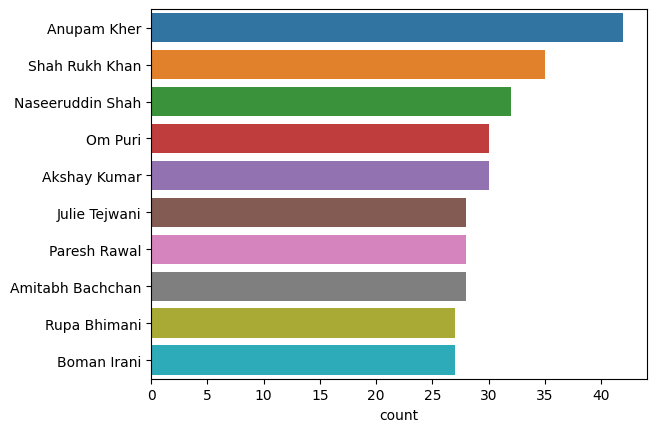

In [57]:
sns.countplot(y = movie_cast, order = movie_cast.value_counts().index[:10] )

In [58]:
tvshow_cast = tt[tt.cast != 'No Cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
tvshow_cast

title
Blood & Water                 Ama Qamata
Blood & Water                Khosi Ngema
Blood & Water              Gail Mabalane
Blood & Water             Thabang Molaba
Blood & Water           Dillon Windvogel
                             ...        
Zindagi Gulzar Hai     Sheheryar Munawar
Zindagi Gulzar Hai       Samina Peerzada
Zindagi Gulzar Hai          Waseem Abbas
Zindagi Gulzar Hai          Javed Sheikh
Zindagi Gulzar Hai    Hina Khawaja Bayat
Length: 19553, dtype: object

<Axes: xlabel='count'>

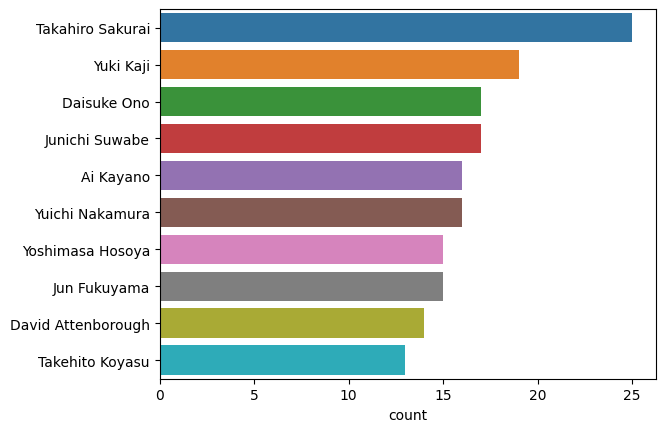

In [59]:
sns.countplot(y = tvshow_cast, order = tvshow_cast.value_counts().index[:10] )

In [61]:
f_directors = dff[dff.director != 'No Director'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
f_directors

title
Dick Johnson Is Dead                Kirsten Johnson
Ganglands                           Julien Leclercq
Midnight Mass                         Mike Flanagan
My Little Pony: A New Generation      Robert Cullen
My Little Pony: A New Generation     José Luis Ucha
                                         ...       
Zinzana                             Majid Al Ansari
Zodiac                                David Fincher
Zombieland                          Ruben Fleischer
Zoom                                   Peter Hewitt
Zubaan                                  Mozez Singh
Length: 6977, dtype: object

<Axes: xlabel='count'>

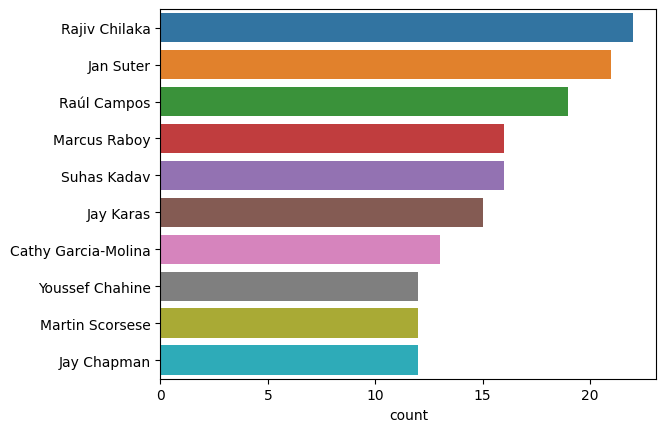

In [62]:
sns.countplot(y = f_directors, order = f_directors.value_counts().index[:10] )

Does Netflix has more focus on TV Shows than movies in recent years

([<matplotlib.patches.Wedge at 0x7c788ee8ff70>,
 [Text(0.6527426191561055, -0.916270742268478, 'Movie'),
  Text(-0.6527426191561054, 0.916270742268478, 'TV Show')],
 [Text(0.36263478842005864, -0.5090393012602655, '69.7%'),
  Text(-0.3626347884200586, 0.5090393012602655, '30.3%')])

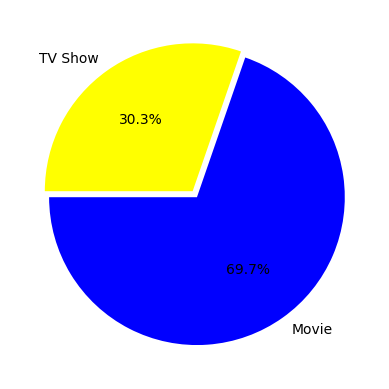

In [68]:
plt.pie(dff.type.value_counts(),explode=(0.025,0.025),labels=dff.type.value_counts().index, colors=['blue','yellow'],autopct='%1.1f%%', startangle=180)

In [75]:
year = dff[dff["release_year"] > 2020]

([<matplotlib.patches.Wedge at 0x7c788ed65cf0>,
 [Text(0.11323957243942816, -1.1192862901124698, 'TV Show'),
  Text(-0.11323957243942803, 1.1192862901124698, 'Movie')],
 [Text(0.06291087357746009, -0.6218257167291498, '53.2%'),
  Text(-0.06291087357746, 0.6218257167291498, '46.8%')])

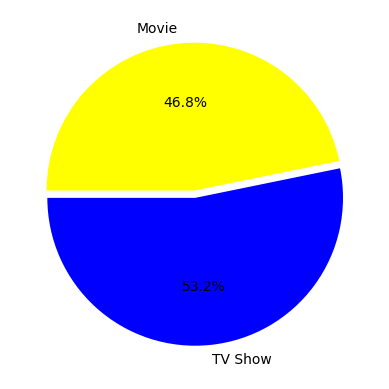

In [74]:
plt.pie(year.type.value_counts(),explode=(0.025,0.025),labels=year.type.value_counts().index, colors=['blue','yellow'],autopct='%1.1f%%', startangle=180)

**from the pie chart it is clear that in the recent years the percentage of TV show viewers are more than movie viewers.**

Understanding what content is available in different countries

In [91]:
grouped_data = dff.groupby(["country","listed_in"])
print((grouped_data.size()))


country            listed_in                                              
, France, Algeria  Dramas, Independent Movies, International Movies           1
, South Korea      International TV Shows, TV Dramas                          1
Argentina          Action & Adventure, Comedies, International Movies         1
                   Action & Adventure, Horror Movies, International Movies    1
                   Children & Family Movies, Music & Musicals                 1
                                                                             ..
Vietnam            Dramas, International Movies                               1
                   Dramas, International Movies, Romantic Movies              1
                   Horror Movies, International Movies, Thrillers             1
West Germany       Documentaries, International Movies                        1
Zimbabwe           Comedies, International Movies, Romantic Movies            1
Length: 2793, dtype: int64


In [85]:
dff[["country","listed_in"]]

,country,listed_in
0,United States,Documentaries
1,South Africa,"International TV Shows, TV Dramas, TV Mysteries"
2,Country Unavailable,"Crime TV Shows, International TV Shows, TV Act..."
3,Country Unavailable,"Docuseries, Reality TV"
4,India,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...
8802,United States,"Cult Movies, Dramas, Thrillers"
8803,Country Unavailable,"Kids' TV, Korean TV Shows, TV Comedies"
8804,United States,"Comedies, Horror Movies"
8805,United States,"Children & Family Movies, Comedies"


In [49]:
coun = dff.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
coun = coun.reset_index()
coun.set_axis(["title","country"], axis=1, inplace=True)
coun

<ipython-input-49-a55d4e5dd6b6>:3: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  coun.set_axis(["title","country"], axis=1, inplace=True)


,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,Country Unavailable
3,Jailbirds New Orleans,Country Unavailable
4,Kota Factory,India
...,...,...
10826,Zodiac,United States
10827,Zombie Dumb,Country Unavailable
10828,Zombieland,United States
10829,Zoom,United States


In [48]:
genre = dff.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
genre = genre.reset_index()
genre.set_axis(["title","genre"], axis=1, inplace=True)
genre

<ipython-input-48-ca0c7d985178>:3: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  genre.set_axis(["title","genre"], axis=1, inplace=True)


,title,genre
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows
...,...,...
19292,Zoom,Children & Family Movies
19293,Zoom,Comedies
19294,Zubaan,Dramas
19295,Zubaan,International Movies


In [50]:

merged = pd.merge(coun, genre,how="inner",on="title")
merged

,title,country,genre
0,Dick Johnson Is Dead,United States,Documentaries
1,Blood & Water,South Africa,International TV Shows
2,Blood & Water,South Africa,TV Dramas
3,Blood & Water,South Africa,TV Mysteries
4,Ganglands,Country Unavailable,Crime TV Shows
...,...,...,...
23723,Zoom,United States,Children & Family Movies
23724,Zoom,United States,Comedies
23725,Zubaan,India,Dramas
23726,Zubaan,India,International Movies


In [80]:
grouped = merged.groupby(["country","genre"]).count().reset_index()
grouped


,country,genre,title
0,,Dramas,1
1,,Independent Movies,1
2,,International Movies,1
3,,International TV Shows,1
4,,TV Dramas,1
...,...,...,...
1459,West Germany,Thrillers,1
1460,Zimbabwe,Comedies,1
1461,Zimbabwe,Documentaries,2
1462,Zimbabwe,International Movies,3


<Axes: xlabel='count', ylabel='genre'>

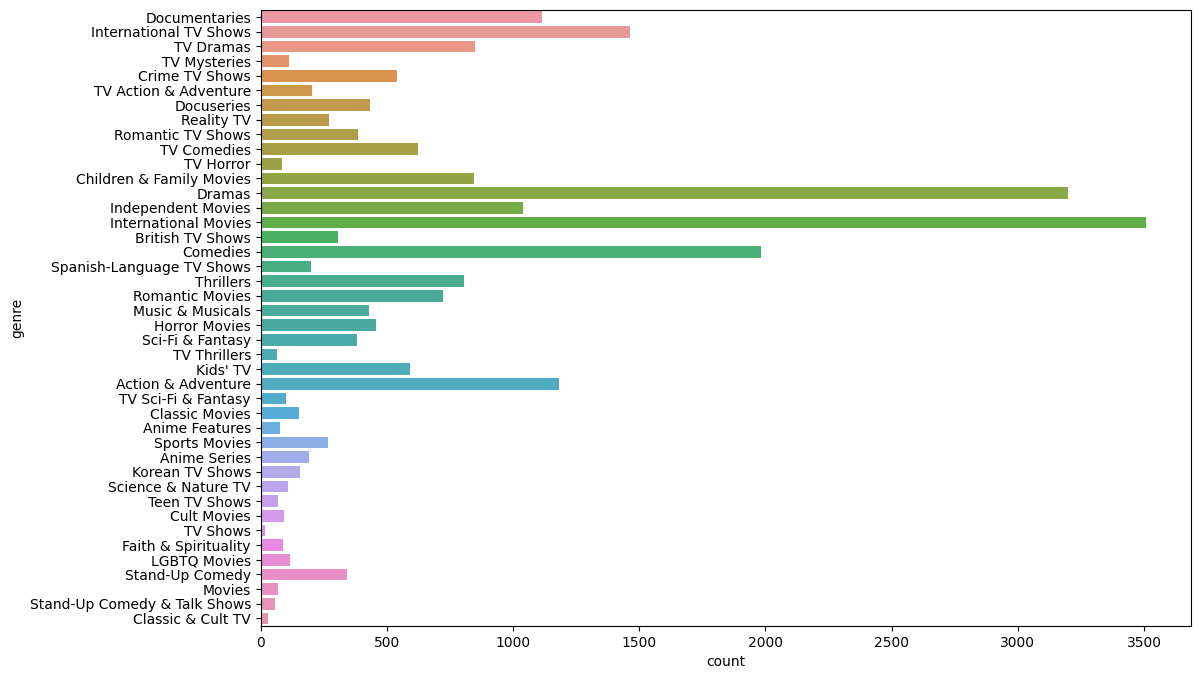

In [85]:
plt.figure(figsize=(12,8))
sns.countplot(data = merged, y = "genre")

**Business Insights**

The most content type on Netflix is movies, The most popular director on Netflix , with the most titles, is Jan Suter.
International Movies is a genre that is mostly in Netflix, The most popular actor on Netflix movie, based on the number of titles, is Anupam Kher.

It's clear that Netflix has grown over the years. We can see it from the data that the company took certain approaches in their marketing strategy to break into new markets around the world.

**Recommendations**

1. We see there is huge no. of viewers for international movies, so it is better to release more and more internation movies.
2. Present generation is attracted to TV shows recently, so producing TV shows is a great idea.
3. Adding films with huge rated stars would increase the no. viewers.
4. Adding Dramas, comedies, international movies and TV shows is a plus point.